# Beijing Home Price Prediction
## A Discussion of Machine Learning and Time-series Models


*Huiling He - CPLN680 Advanced Topic in GIS*


<br>

### Home Price Data 
Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com
https://www.kaggle.com/ruiqurm/lianjia

<br>

### Housing price is determined by:
- #### Housing characteristics
    - Numbers of bedrooms&bathrooms, areas, building types, construction time...

- #### Spatial location
    - Distance to public transits, amenities, neighborhood...
- #### Time
    - Housing market tends to move in cycles
- #### Policy

......

<br>

### A web map of the data:
https://huilingh.github.io/CPLN680-AdvancedGIS-web-application/index

In [1]:
# import dependencies
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# read the final home price data
read = pd.read_csv("Beijing_homeprice_2011_2017/BJ_houseprice_prediction.csv", engine='python')
read.head()

# filter dates in 2011-2017 and drop NA
filtered = read.loc[(read['year']>2010) & (read['year']<2018)].dropna()
filtered.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,RI,DENSITY,MIX,FUNCTION,subDens,busDens,elemDens,midDens,univDens,function
0,https://bj.lianjia.com/chengjiao/101086012217....,1.01086E+11,116.453917,39.881534,1.111030e+12,2016-07-28,903.0,126,575.0,43436,...,1.0,284.906260,0.931940,RES,5185.300,1196.020,9302.30,13734.80,0.0000,6.0
1,https://bj.lianjia.com/chengjiao/101086041636....,1.01086E+11,116.561978,39.877145,1.111040e+12,2016-12-11,1271.0,48,1030.0,52021,...,0.0,13.630786,1.570776,GRE,418.143,1305.890,1585.87,471.24,0.0000,5.0
2,https://bj.lianjia.com/chengjiao/101086406841....,1.01086E+11,116.438010,40.076114,1.111040e+12,2016-09-30,965.0,138,297.5,22202,...,1.0,109.826447,0.803315,GRE,2552.570,1127.630,2423.13,3758.34,302.9080,5.0
3,https://bj.lianjia.com/chengjiao/101086920653....,1.01087E+11,116.428392,39.886229,1.111030e+12,2016-08-28,927.0,286,392.0,48396,...,1.0,352.991653,1.332179,EDU,5251.940,1394.960,11741.10,16389.70,64.3264,3.0
4,https://bj.lianjia.com/chengjiao/101087277815....,1.01087E+11,116.466280,39.991363,1.111030e+12,2016-07-22,861.0,57,275.6,52000,...,1.0,45.019975,1.418484,GRE,3744.280,840.654,6633.06,9864.80,16982.2000,5.0


In [3]:
# average home price per year and per month
ave_price = filtered.groupby(['year', 'month'])['price'].mean().round().reset_index()
ave_price['date'] = pd.to_datetime(ave_price[['year', 'month']].assign(Day=1))

ave_price.head()

,year,month,price,date
0,2011,1,19145.0,2011-01-01
1,2011,2,17556.0,2011-02-01
2,2011,3,17988.0,2011-03-01
3,2011,4,18613.0,2011-04-01
4,2011,5,16713.0,2011-05-01


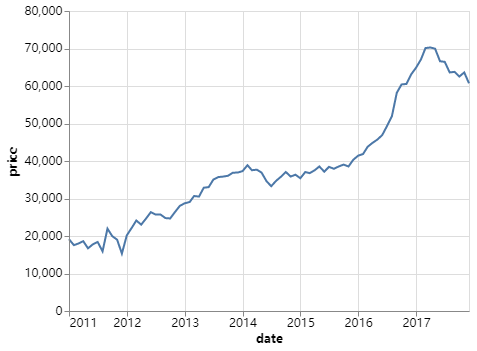

In [4]:
# plot average price per month
# basic line
line = alt.Chart().mark_line().encode(
    x='date:T', y='price:Q',
    tooltip=[alt.Tooltip('price:Q', title='Price/m²'), alt.Tooltip('date:T', timeUnit='yearmonth', title='Date')])


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_price = alt.layer(line, selectors, points, rules, data=ave_price)
line_price

In [5]:
# plot monthly home price by districts
# average home price per year and per month and per district
price_dist = filtered.groupby(['year', 'month', 'district_name'])['price'].mean().round().reset_index()
price_dist['date'] = pd.to_datetime(price_dist[['year', 'month']].assign(Day=1))

price_dist.head()

,year,month,district_name,price,date
0,2011,1,Mentougou,19145.0,2011-01-01
1,2011,2,Mentougou,17556.0,2011-02-01
2,2011,3,Mentougou,17988.0,2011-03-01
3,2011,4,Mentougou,18613.0,2011-04-01
4,2011,5,Mentougou,16713.0,2011-05-01


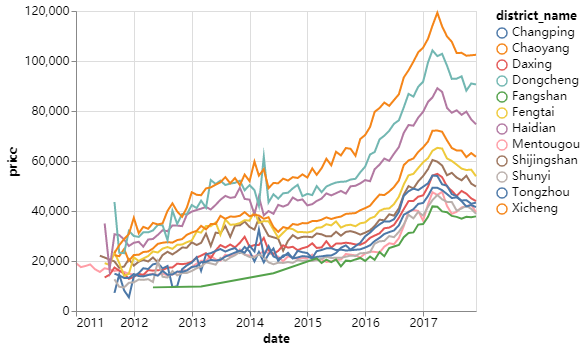

In [6]:
# altair plot
# basic line
line = alt.Chart().mark_line().encode(
    x='date:T', y='price:Q', color='district_name:N',
    tooltip=[alt.Tooltip('price:Q', title='Price/m²'), 
             alt.Tooltip('date:T', timeUnit='yearmonth', title='Date'), 
             alt.Tooltip('district_name:N', title="District")])


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_price_dist = alt.layer(line, selectors, points, rules, data=price_dist)
line_price_dist

## Machine Learning vs. Time-series model

- #### Feature engineering
    *The process of finding and creating features using domain knowledge in machine learning predictions is called feature engineering, which is fundamental to the application of machine learning. (Wikipedia)*

<br>

- #### Time-series prediction on historic pattern

## Random Forest

- #### Basic understanding of Random Forest: 
    - Decision tree, bagging
    
<img src="presentation_pic/DecisionTree.png" style="width: 400">

*Source: cited from Lecture 24 in CPLN 671 – Popular classification and regression machine learning algorithms*

<img src="presentation_pic/RandomForest_simplify.png" style="width: 400">

*Source: https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d*


## Random Forest

- #### Not the best way to handle time factors
    - The future real values of predictors are unclear
    - Using predicted predictors may increase the error

- #### Use cases of Random Forest prediction
    - Analyzing different (spatial) factors
    - Site selection

- #### Model results

In [7]:
# read final dataset
data = pd.read_csv("Beijing_homeprice_2011_2017/BJ_houseprice_prediction.csv", engine='python')

In [8]:
# Random Forest ---------------------------------------------------------------------------------------
# split the dataset into labels (DV) and predictors (features) and convert them into array
import numpy as np
import matplotlib.pyplot as plt


labels = np.array(data['price'])
droplist = ['url','id', 'Lng','Lat','Cid','tradeTime','followers','totalPrice','price','square','district_name','communityAverage', 'Lng_transed','Lat_transed','district_y','FUNCTION','subway']

selected_fields = data.drop(droplist, axis=1)
features = np.array(selected_fields)

# saving features names for later uses
features_list = list(selected_fields)

# split to training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# check if everything is correct
print("training features shape:", train_features.shape)
print("training label shape:", train_labels.shape)
print("testing features shape:", test_features.shape)
print("testing label shape:", test_labels.shape)

training features shape: (79523, 35)
training label shape: (79523,)
testing features shape: (26508, 35)
testing label shape: (26508,)


In [9]:
# Import random forest model
from sklearn.ensemble import RandomForestRegressor

# set 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training set
rf.fit(train_features, train_labels)

# predict on test set
predictions = rf.predict(test_features)

                  0
count  26508.000000
mean    4025.415347
std     4981.232669
min        0.790000
25%     1097.797500
50%     2536.975000
75%     5064.007500
max    74188.930000
Mean Absolute Error: 4025.42
MAPE: 1.21


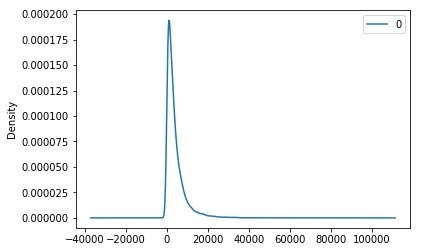

In [10]:
# calculate the absolute error
errors = abs(predictions-test_labels)
err_df = pd.DataFrame(errors)
err_df.plot(kind='kde')
print(err_df.describe())

# mean absolute error (MAE)
mae = round(np.mean(errors), 2)
print("Mean Absolute Error:", mae)

# calculate the accuracy from MAPE (mean absolute precent error)
mape = np.mean(errors/test_labels)
print("MAPE:", round(mape, 2))

Variable: DOM                  Importance: 0.23
Variable: midDens              Importance: 0.19
Variable: subDens              Importance: 0.13
Variable: pop_dens             Importance: 0.08
Variable: migrant_pop          Importance: 0.05
Variable: PPI                  Importance: 0.04
Variable: busDens              Importance: 0.03
Variable: elemDens             Importance: 0.03
Variable: constructionTime     Importance: 0.02
Variable: district_x           Importance: 0.02
Variable: univDens             Importance: 0.02
Variable: livingRoom           Importance: 0.01
Variable: totalFloor           Importance: 0.01
Variable: ladderRatio          Importance: 0.01
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: pop                  Importance: 0.01
Variable: GDP                  Importance: 0.01
Variable: CLI                  Importance: 0.01
Variable: BCI                  Importance: 0.01
Variable: CCI                  Importanc

<BarContainer object of 35 artists>

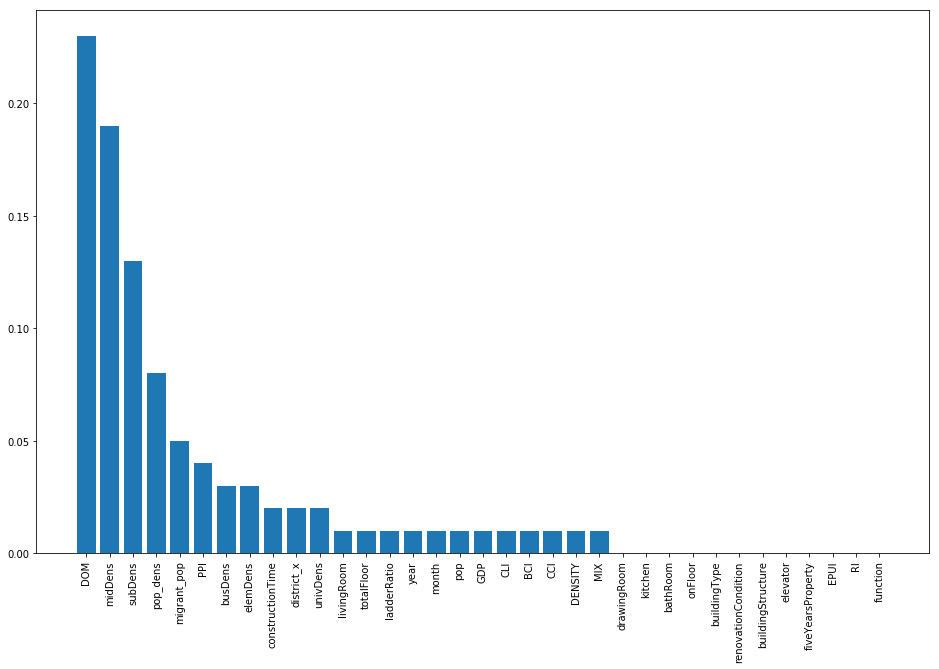

In [11]:
# feature importance
importances = list(rf.feature_importances_)
feature_importance = [(feature, round(importance,2))
    for feature, importance in zip(features_list, importances)]

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

# plot feature importance
importances_df = pd.DataFrame(feature_importance, columns=['variable', 'importance'])
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
plt.bar('variable', 'importance', data=importances_df)

## Time-series Model (ARIMA)

- #### ARIMA (Auto-Regressive Integrated Moving Average)
    - ##### Trend, seasonality, noise:
    - a pattern of growth/decline in the data is accounted for (hence the “auto-regressive” part)
    - the rate of change of the growth/decline in the data is accounted for (hence the “integrated” part)
    - noise between consecutive time points is accounted for (hence the “moving average” part)

*Source: https://ademos.people.uic.edu/Chapter23.html*

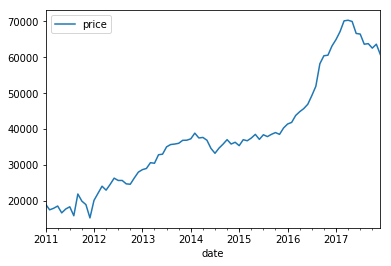

In [12]:
# average monthly price
monthly_price = data.groupby(['year', 'month'])['price'].mean().reset_index()
# taking dates from 2011 to 2017
monthly_price = monthly_price.loc[monthly_price['year'] > 2010]

import datetime
monthly_price['date'] = pd.to_datetime(monthly_price[['year', 'month']].assign(day=1))
monthly_price.head()

price = monthly_price[['date','price']]

# set date as index
price = price.set_index('date')
price.plot()

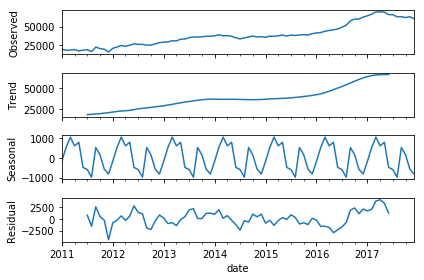

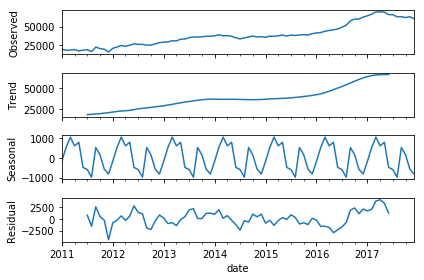

In [13]:
# decomposite historic data
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

decomposite = sm.tsa.seasonal_decompose(price)
decomposite.plot()

## Time-series Model (ARIMA)

- #### Model results

In [14]:
# split training and test sets
train = monthly_price.loc[(monthly_price['year'] >= 2011) & (monthly_price['year'] <= 2016)][['date','price']].set_index('date')
test = monthly_price.loc[monthly_price['year'] == 2017][['date','price']].set_index('date')

# one-step prediction on test set
predict = []
train_list = [x for x in train['price']]
test_list = [x for x in test['price']]

for t in range(len(test_list)):
    model = ARIMA(train_list, order=(10,1,0))
    fit = model.fit(disp=0)
    yhat = fit.forecast()[0]
    predict.append(yhat)
    obs = test_list[t]
    train_list.append(obs)
    print("predicted=%f, observed=%f" % (yhat, obs))

predicted=65014.285693, observed=64902.629032
predicted=67039.430758, observed=67113.295352
predicted=69020.332274, observed=70109.444272
predicted=71658.553376, observed=70276.339376
predicted=71749.887811, observed=69941.329858
predicted=72037.171048, observed=66606.464741
predicted=66808.792846, observed=66436.520345
predicted=66727.832210, observed=63615.733221
predicted=64048.581024, observed=63769.621275
predicted=62271.977303, observed=62524.045354
predicted=61922.825576, observed=63618.653996
predicted=62770.109111, observed=60717.240365


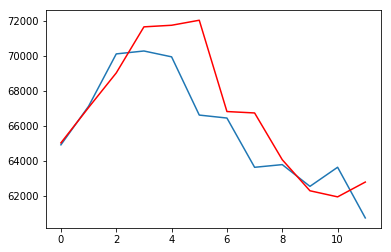

In [15]:
# plot predicted and observed values
plt.plot(test_list)
plt.plot(predict, color='red')
plt.show()

In [16]:
# one-step prediction on the next 12 months
history = [x for x in price['price']]
model = ARIMA(history, order=(10,1,0))
fit = model.fit(disp=0)
yhat = fit.forecast(steps=12)[0]

full = history
for i in range(len(yhat)): full.append(yhat[i])

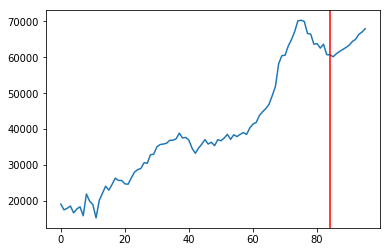

In [17]:
plt.plot(full)
plt.axvline(x=84, color='red')

## Next Step

- Improve model performance
- Combine the result of Random Forest and ARIMA
- Web page